In [89]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
with open('../data/netflix-data/movie_titles.csv', encoding="latin-1") as f:
    movie_titles = f.read().split('\n')

movie_titles_f = [title.split(',', 2)[1:] for title in movie_titles]
movie_df = pd.DataFrame(movie_titles_f, columns=['year', 'title'], index=range(1, len(movie_titles_f) + 1))
movie_df

,year,title
1,2003,Dinosaur Planet
2,2004,Isle of Man TT 2004 Review
3,1997,Character
4,1994,Paula Abdul's Get Up & Dance
5,2004,The Rise and Fall of ECW
...,...,...
17766,2002,Where the Wild Things Are and Other Maurice Se...
17767,2004,Fidel Castro: American Experience
17768,2000,Epoch
17769,2003,The Company


/var/folders/m0/9x472rhj3c5fz9k3rhcq1c7w0000gn/T/ipykernel_42918/2220239178.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data, x="year", bins=range(1890, 2010, 10), palette="deep")


<Figure size 600x400 with 0 Axes>

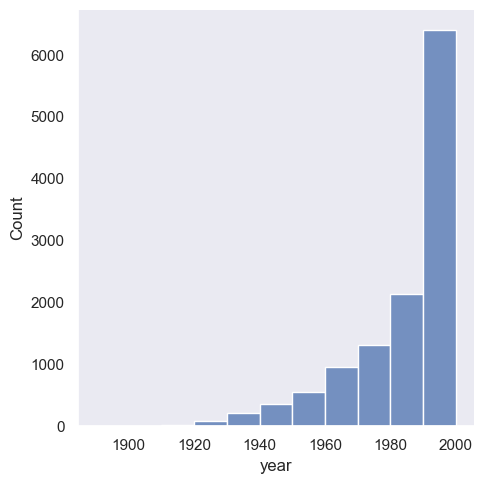

In [136]:
data = movie_df.copy()
data['year'] = pd.to_numeric(movie_df['year'], errors='coerce')
data = data.dropna(subset=['year'])
data.sort_values('year', inplace=True)

sns.set_style("dark")

plt.figure(figsize=(6,4))
sns.displot(data, x="year", bins=range(1890, 2010, 10), palette="deep")
plt.show()

In [151]:
dataset = [None] * 17770

ix = 0
for i in range(1, 5):
    with open(f'../data/netflix-data/combined_data_{i}.txt') as f:
        for line in f:
            if ':' in line:
                movie_id = int(line[:-2])
            else:
                user_id, rating, _ = line.split(',')
                user_id = int(user_id)
                rating = int(rating)
                if dataset[movie_id] is None:
                    dataset[movie_id] = []
                dataset[movie_id].append((user_id, rating))
print(dataset[0])

IndexError: list index out of range

In [ ]:
avgs = [None]

for i in range(1, 17771):
    s = 0
    for _, rating in dataset[i]:
        s += rating
    avgs.append(s / len(dataset[i]))
    
movie_df['avg_rating'] = avgs

ValueError: Length of values (17771) does not match length of index (17770)

KeyError: '1'